<a href="https://colab.research.google.com/github/biplobsd/ImageClassificationTest/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict:  Indian


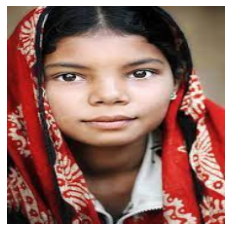

In [5]:
#@title Test Model
tflite_pretrained = "imgnetPLUSresnet_50" #@param ["imgnetPLUSresnet_50", "imgnet", "resnet_v1_50"]
Image_path = "/content/download.jpg" #@param {type:"string"}

try:
  tflite_pretrainedc
except:
  tflite_pretrainedc = ''
  
import numpy as np
import cv2
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from IPython.display import clear_output

def prepare(filepath):
  img = cv2.imread(filepath)
  plt.axis('off')
  resized_img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(224,224)).astype(np.float32)/255
  plt.imshow(resized_img)
  return resized_img.reshape(1, 224, 224, 3)

def lite_model(interpreter, images):
  interpreter.allocate_tensors()
  interpreter.set_tensor(interpreter.get_input_details()[0]['index'], images)
  interpreter.invoke()
  return interpreter.get_tensor(interpreter.get_output_details()[0]['index'])

if tflite_pretrained == 'imgnet':
  filePath = '/content/lite_ImageClassification_imgnet.tflite'
  tflitFileUrl = 'https://github.com/biplobsd/ImageClassificationTest/releases/download/0.0.2/lite_ImageClassification_imgnet.tflite'
elif tflite_pretrained == 'resnet_v1_50':
  filePath = '/content/lite_ImageClassification_resnet_v1_50.tflite'
  tflitFileUrl = 'https://github.com/biplobsd/ImageClassificationTest/releases/download/0.0.2/lite_ImageClassification_resnet_v1_50.tflite'
elif tflite_pretrained == 'imgnetPLUSresnet_50':
  filePath = '/content/lite_ImageClassification_imgnetPLUSresnet_50_v1.1.tflite'
  tflitFileUrl = 'https://github.com/biplobsd/ImageClassificationTest/releases/download/0.0.2/lite_ImageClassification_imgnetPLUSresnet_50_v1.1.tflite'

if not tflite_pretrainedc is tflite_pretrained:
    interpreter = ''
    tflite_pretrainedc = tflite_pretrained

if not os.path.exists(filePath):
  !wget $tflitFileUrl
  clear_output()



if interpreter == '':
  interpreter = tf.lite.Interpreter(model_path=filePath)


faces_labels_list = [
    'East Asian',
    'Indian',
    'Southeast Asian'
]

imgArray = prepare(Image_path)

prediction = lite_model(interpreter, imgArray)
print('Predict: ',faces_labels_list[np.argmax(prediction)])